# Exploring relationships without 0 values, but with extreme outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/6. Advanced Analytics/Project_Waste in the world'

In [3]:
#Import dataframes

df_all = pd.read_csv(os.path.join(path,'Prepared data','Complete_Dataset_2.csv'), index_col = False)


## Removing 0.0 values in 'Emissions quantity, tonnes'

In [4]:
values_to_remove = [0.0] 

In [5]:
#Removing 0.0 values from the column 
df_all = df_all[~df_all['Emissions quantity, tonnes'].isin(values_to_remove)]

## Scatterplots without 0.0 values of Emissions

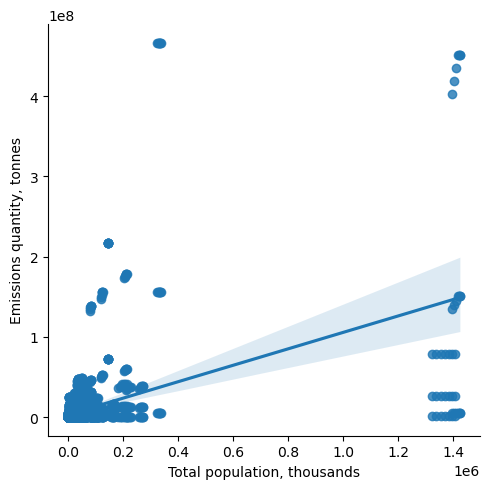

In [6]:
#Scatterplot without 0.0 values

#Emissions quantity & Total population
sns.lmplot(x = 'Total population, thousands', y = 'Emissions quantity, tonnes', data = df_all)


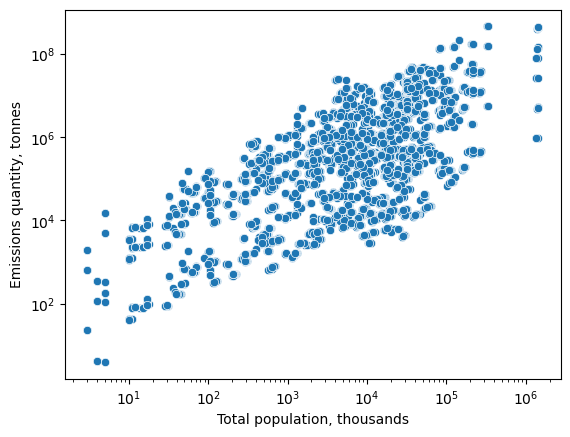

In [7]:
#create scatterplot with log scale on both axes
sns.scatterplot(data=df_all, x='Total population, thousands', y='Emissions quantity, tonnes')
plt.xscale('log')
plt.yscale('log')

In [8]:
# Create a subset excluding the "Country", "Year", 'Type of emissions', 'Gas type' columns

sub = df_all[['Emissions quantity, tonnes', 'Total population, thousands', 'Population density', 'GDP per capita', 'WMG']]

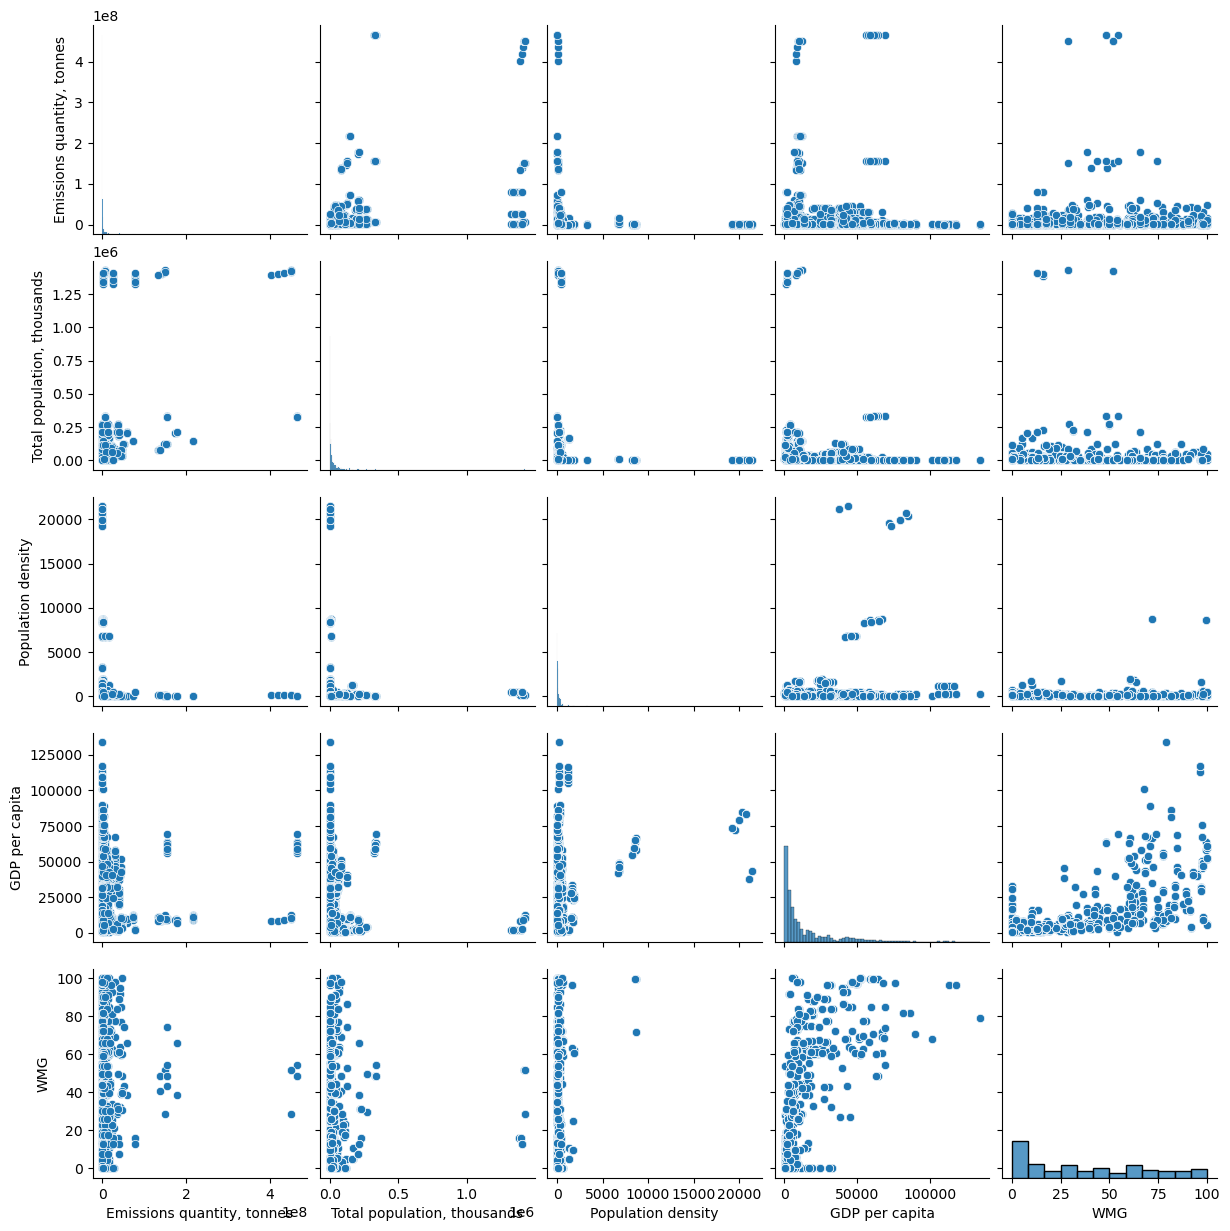

In [9]:
# Create a pair plot 

g = sns.pairplot(sub)

## Dropping the column 'Country category by emissions' to create new flags

In [10]:
df_all = df_all.drop(columns=['Country category by emissions'])

## Calculating st.dev. and mean

In [11]:
std_dev = df_all['Emissions by year & country'].std()

In [12]:
mean = df_all['Emissions by year & country'].mean()

In [13]:
one_st_dev_away = mean + std_dev

In [14]:
mean

19340895.3451455

In [15]:
min = df_all['Emissions by year & country'].min()

In [16]:
min

436.18

In [17]:
one_st_dev_away

85774465.21109845

In [18]:
two_st_dev_away = mean + (2*std_dev)

In [19]:
two_st_dev_away

152208035.0770514

In [20]:
max = df_all['Emissions by year & country'].max()

In [21]:
max

627625504.0

In [22]:
q3 = df_all['Emissions by year & country'].quantile(0.75)

In [23]:
q3

14690000.0

In [24]:
q2 = df_all['Emissions by year & country'].quantile(0.50)

In [25]:
q2

2542500.0

In [26]:
q1 = df_all['Emissions by year & country'].quantile(0.25)

In [27]:
q1

438722.5

In [28]:
three_st_dev_away = mean + (3*std_dev)

In [29]:
three_st_dev_away

218641604.94300434

## Creating flags

In [38]:
df_all.loc[(df_all['Emissions by year & country'] >= min) & (df_all['Emissions by year & country'] <= q1), 'Country category by emissions'] = 'Low emissions country'


In [39]:
df_all.loc[(df_all['Emissions by year & country'] > q1) & (df_all['Emissions by year & country'] <= q2), 'Country category by emissions'] = 'Insignificant emissions country'


In [40]:
df_all.loc[(df_all['Emissions by year & country'] > q2) & (df_all['Emissions by year & country'] <= mean), 'Country category by emissions'] = 'Moderate emissions country'


In [41]:
df_all.loc[(df_all['Emissions by year & country'] > mean) & (df_all['Emissions by year & country'] <= two_st_dev_away), 'Country category by emissions'] = 'High emissions country'


In [42]:
df_all.loc[df_all['Emissions by year & country'] > two_st_dev_away, 'Country category by emissions'] = 'Extreme emissions country'


In [43]:
df_all['Country category by emissions'].value_counts()

Moderate emissions country         1410
Low emissions country              1134
Insignificant emissions country    1134
High emissions country              732
Extreme emissions country           126
Name: Country category by emissions, dtype: int64

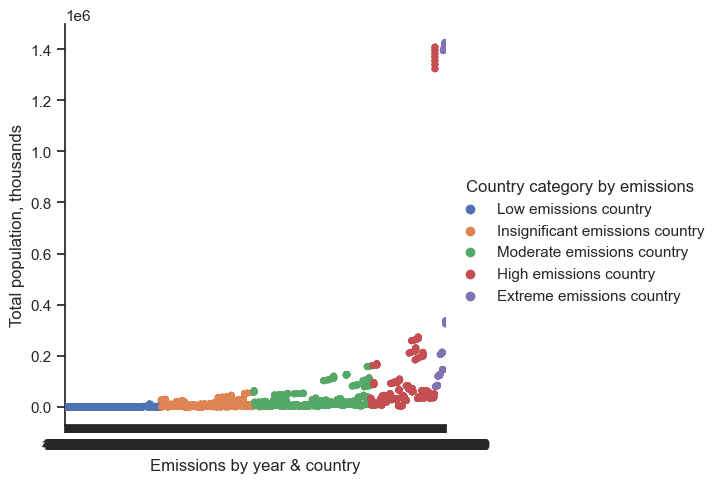

In [44]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Emissions by year & country", y="Total population, thousands", hue="Country category by emissions", data=df_all)

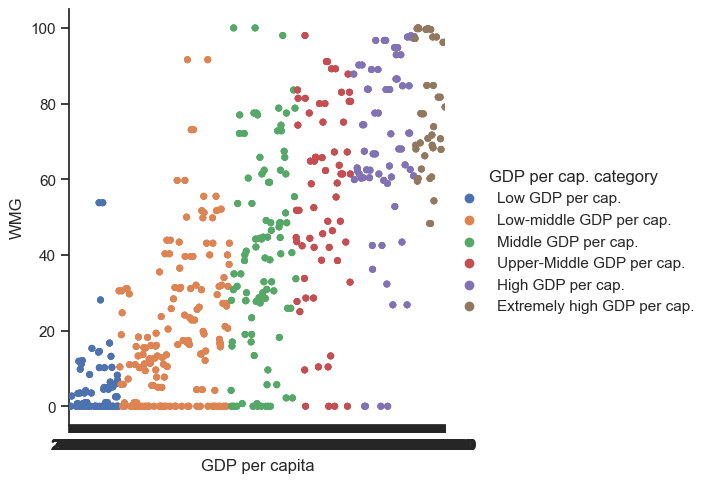

In [45]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g_1 = sns.catplot(x="GDP per capita", y="WMG", hue="GDP per cap. category", data=df_all)